## Initial debug for RoA Non-physical rain amounts

This is a quick notebook to demonstrate some days having non-physical amounts of rain in horizontal bands of the data.

The data I'm using here has already been aggregated to the daily level. You can see how I did that in sheerwater/data/rain_over_africa.py, but basically I opened the original 15 minutely files, aggregated, then multiplied by 0.25 (because the unites are mm/hr and there are 4 15 minute files/hour)

I don't know if these bad values are coming from inidividual 15-minute files or multiple of them. Next steps may be to drill down into those source files.

In [33]:
from sheerwater.data.rain_over_africa import roa_gridded

In [13]:
ds = roa_gridded("2020-01-01", "2025-12-31", grid='roa', region='Africa', remote=True, remote_config='large_cluster')

Output()

╭──────────────────────────────── Package Info ────────────────────────────────╮
│                ╷                                                             │
│   Package      │ Note                                                        │
│ ╶──────────────┼───────────────────────────────────────────────────────────╴ │
│   sheerwater   │ Wheel built from ~/rhiza/sheerwater                         │
│   python       │ https://conda.anaconda.org/conda-forge/,conda-forge         │
│                ╵                                                             │
╰──────────────────────────────────────────────────────────────────────────────╯

Output()

2026-02-18 09:30:36,938 - distributed.deploy.adaptive - INFO - Adaptive scaling started: minimum=10 maximum=11


Google Application Default Credentials have been written to a file on your Coiled VM(s).
These credentials will potentially be valid until explicitly revoked by running
gcloud auth application-default revoke
nuthatch INFO: Found cache for roa_gridded/grid_roa with backend zarr in root cache
nuthatch INFO: Found cache for spatial_subdivision_regions/grid_roa in memory.
nuthatch INFO: Found cache for polygon_subdivision_geodataframe/level_continent with backend basic in root cache


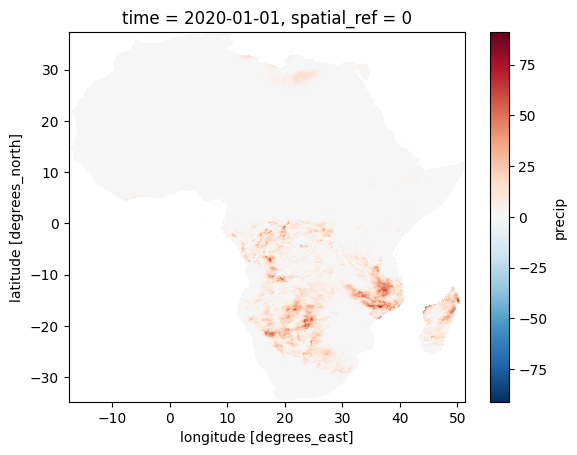

In [14]:
# Plot just to make sure the data looks reasonable. These are accumulated amounts from 1 day
ds.precip.isel(time=0).plot(x='lon', y='lat')

In [23]:
# find days that have non-physical amounts of rain. In my code I looked for 350mm in one days
import numpy as np
ds = ds.where(ds.max(dim=["lat", "lon"]) >= 350, np.nan)
ds = ds.dropna(dim='time', how='all')
ds = ds.persist()

In [24]:
# List of days in which the maximum grid cell is over 350mm
ds.time.values

array(['2020-01-16T00:00:00.000000000', '2020-02-03T00:00:00.000000000',
       '2020-03-03T00:00:00.000000000', '2020-03-05T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-06-12T00:00:00.000000000',
       '2020-07-18T00:00:00.000000000', '2020-08-03T00:00:00.000000000',
       '2020-10-06T00:00:00.000000000', '2020-10-09T00:00:00.000000000',
       '2020-10-12T00:00:00.000000000', '2020-11-26T00:00:00.000000000',
       '2021-02-07T00:00:00.000000000', '2021-02-23T00:00:00.000000000',
       '2021-03-03T00:00:00.000000000', '2021-03-04T00:00:00.000000000',
       '2021-03-05T00:00:00.000000000', '2021-03-15T00:00:00.000000000',
       '2021-06-26T00:00:00.000000000', '2021-08-28T00:00:00.000000000',
       '2021-10-07T00:00:00.000000000', '2021-11-23T00:00:00.000000000',
       '2021-11-26T00:00:00.000000000', '2021-12-07T00:00:00.000000000',
       '2021-12-09T00:00:00.000000000', '2022-03-02T00:00:00.000000000',
       '2022-03-03T00:00:00.000000000', '2022-03-05

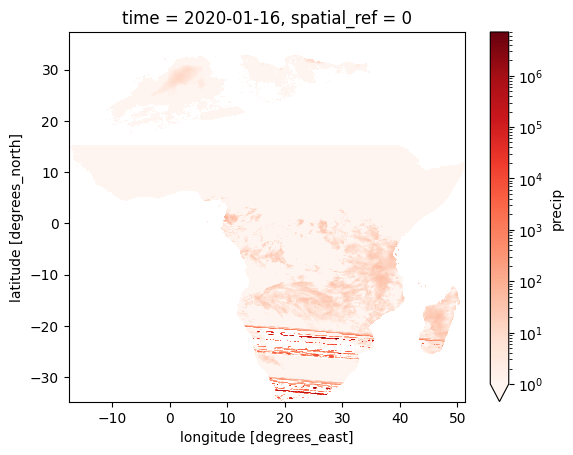

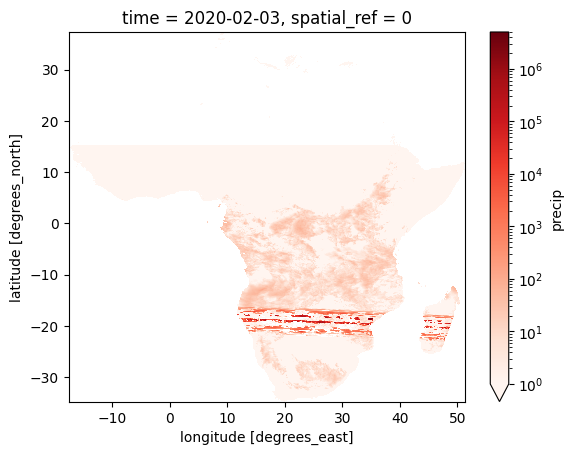

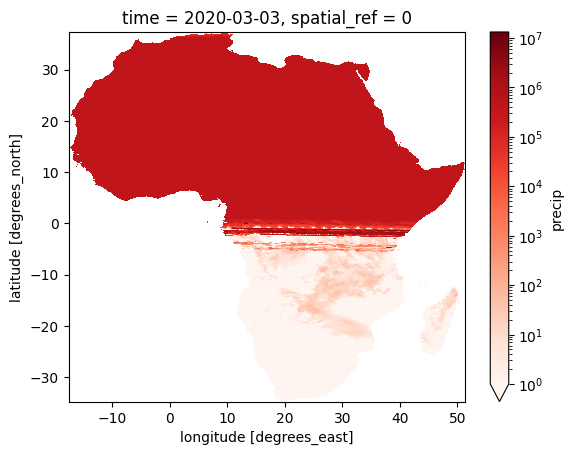

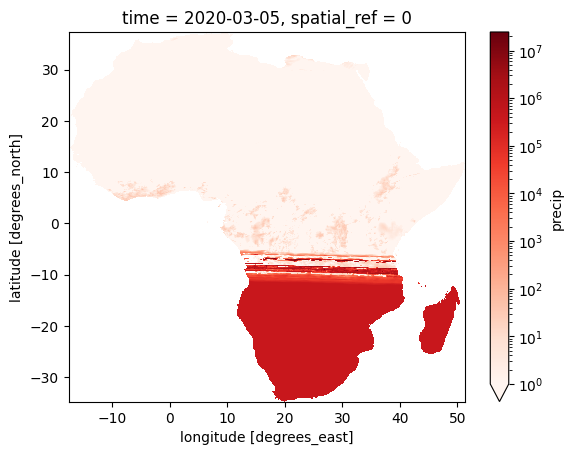

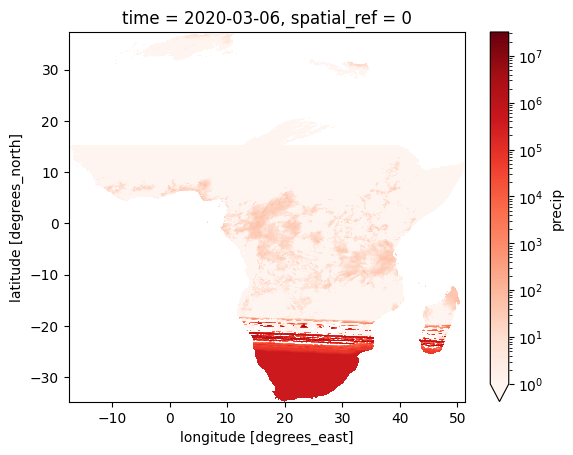

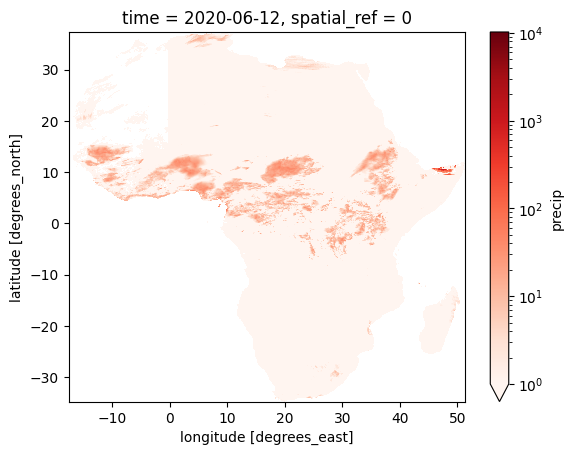

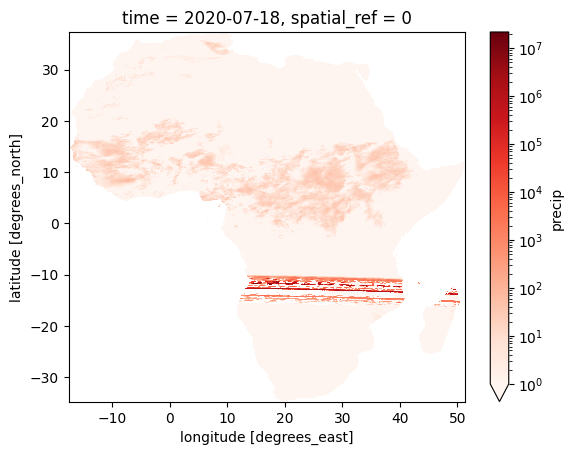

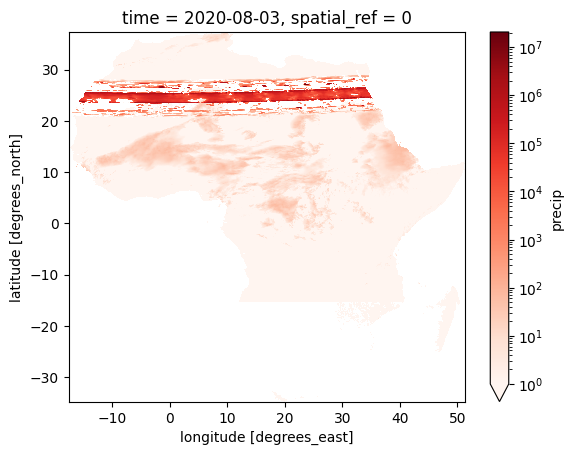

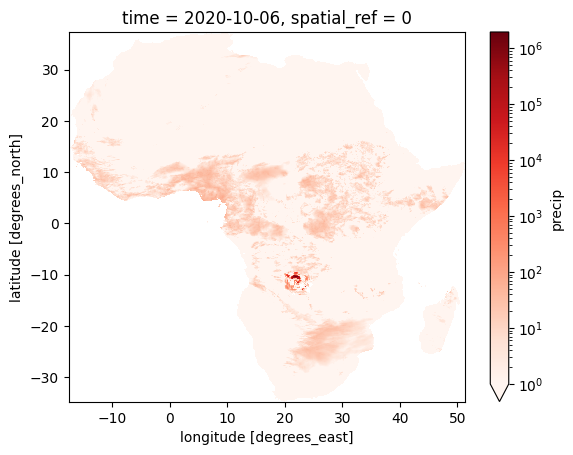

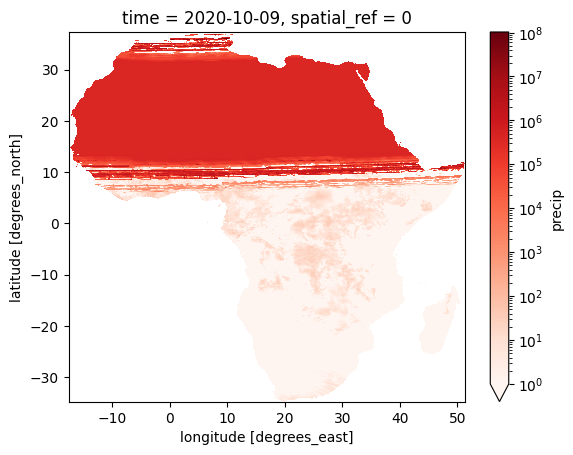

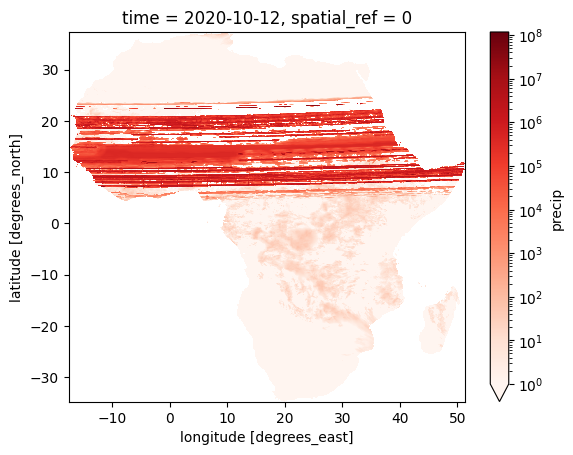

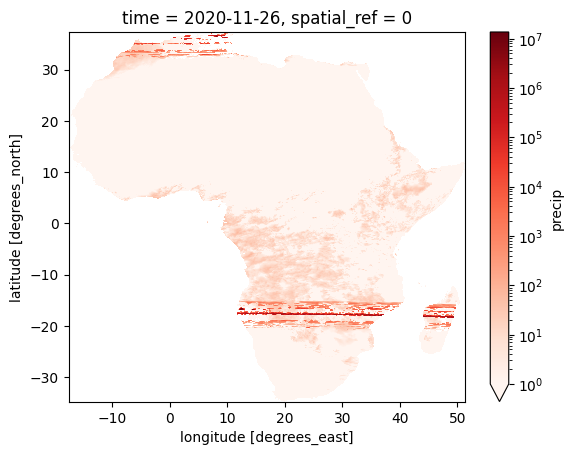

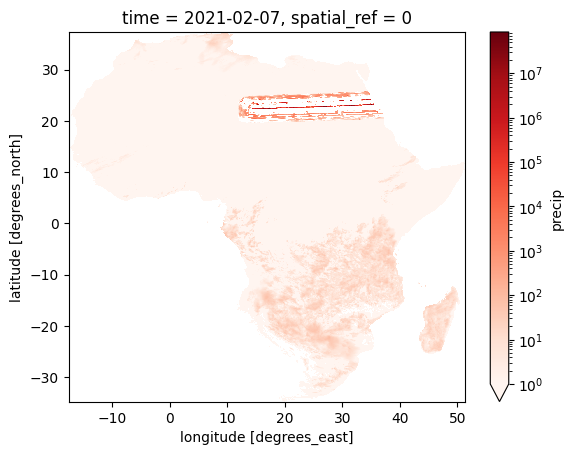

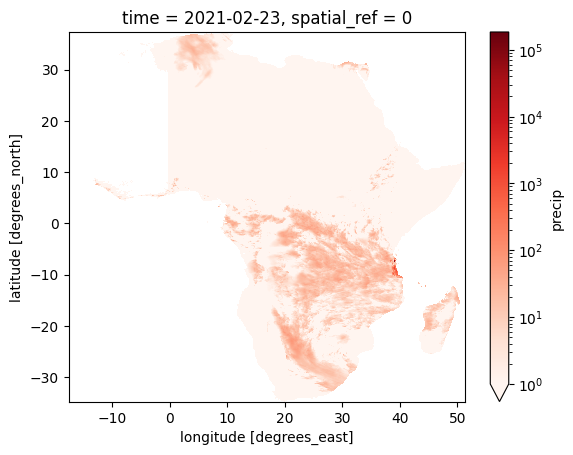

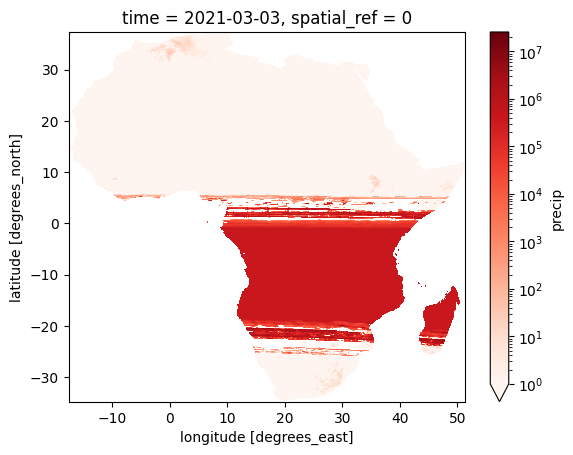

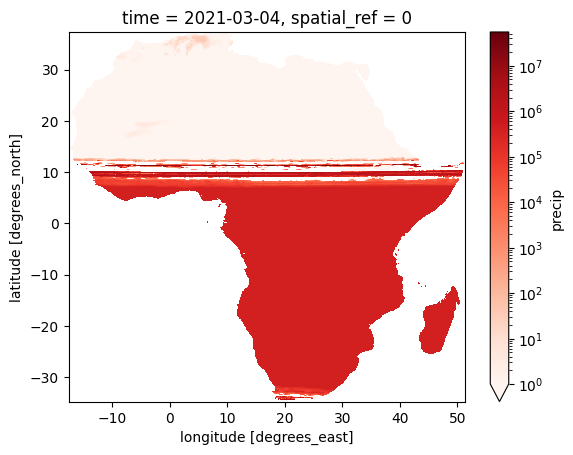

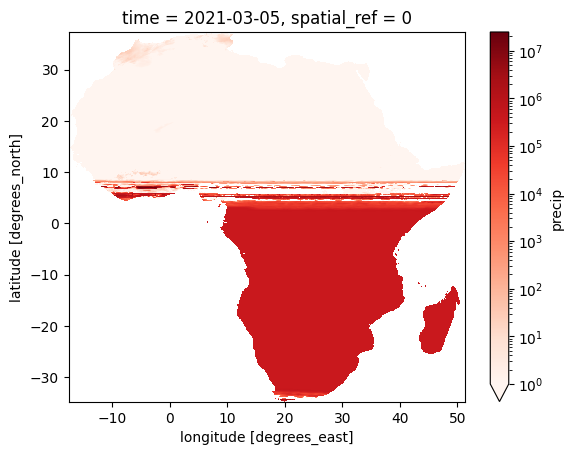

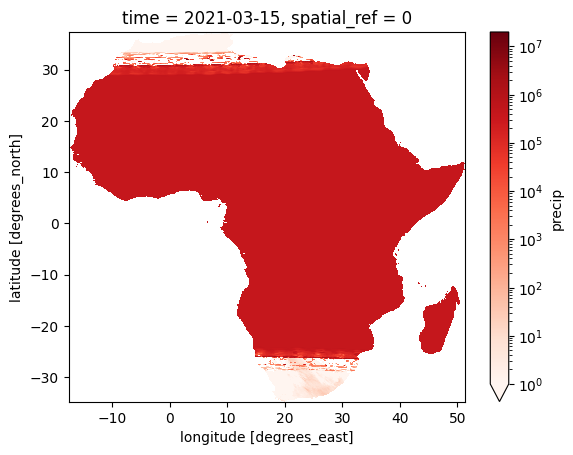

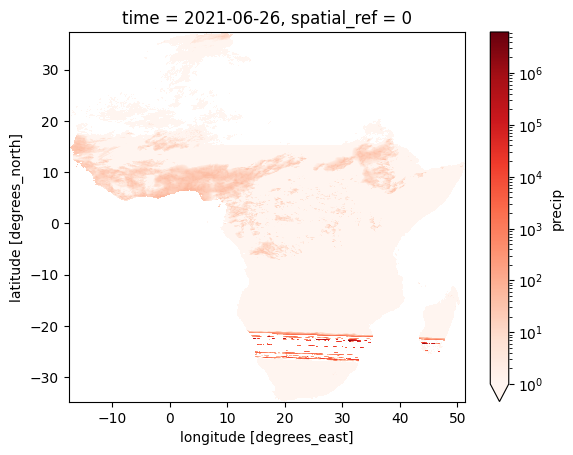

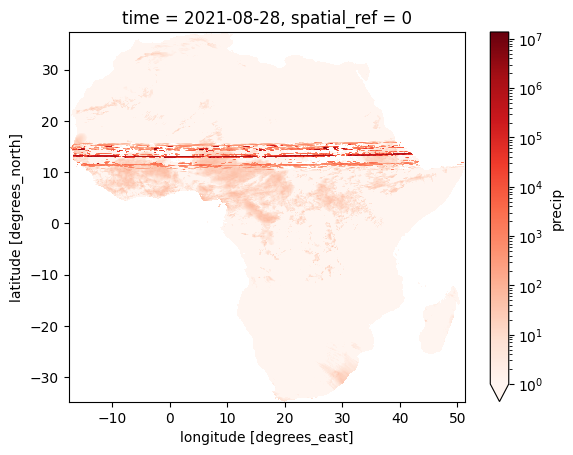

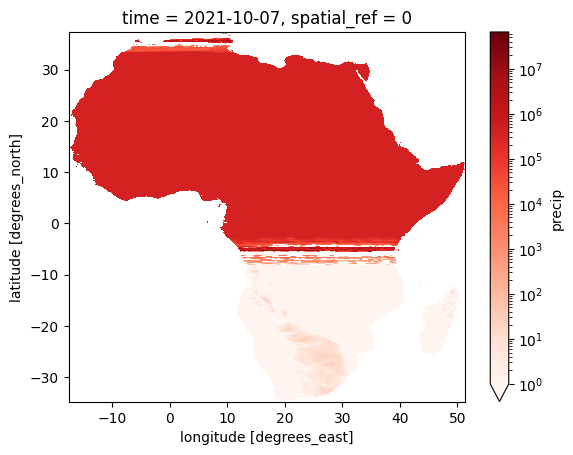

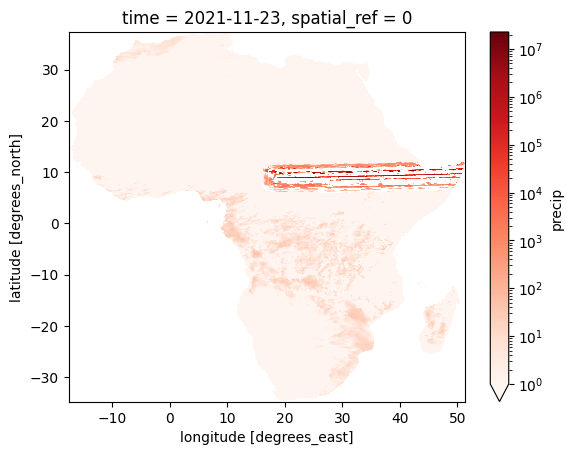

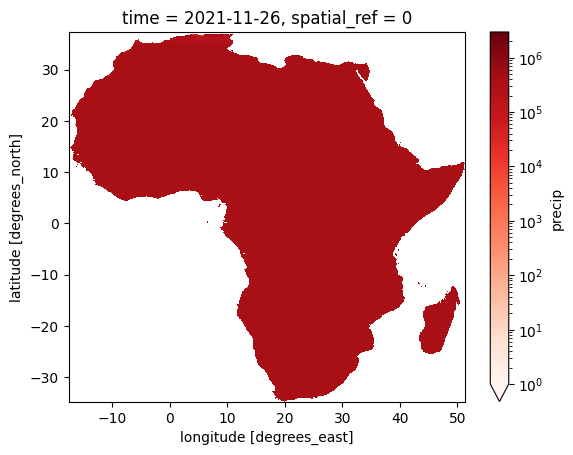

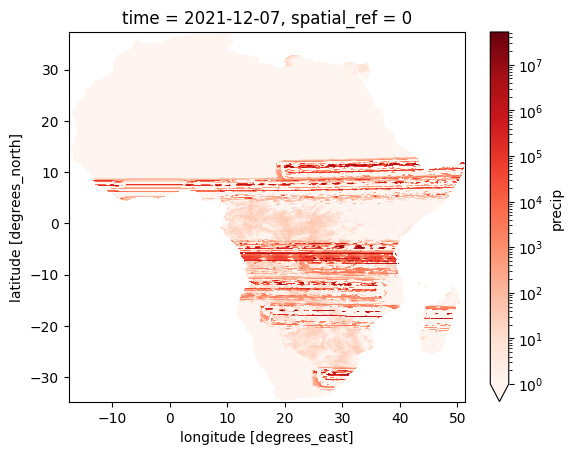

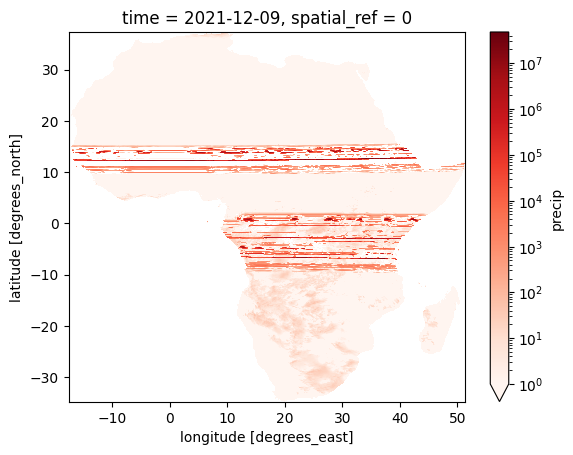

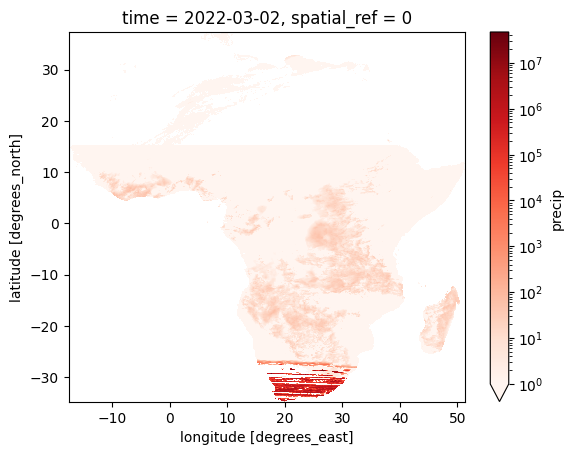

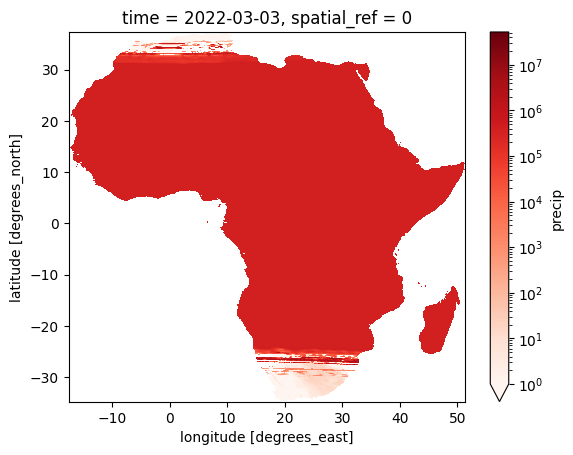

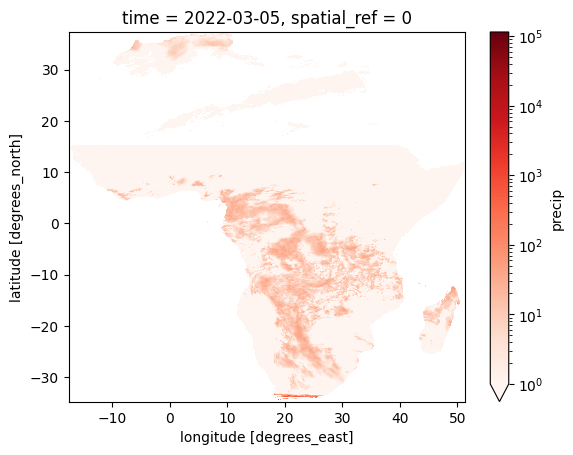

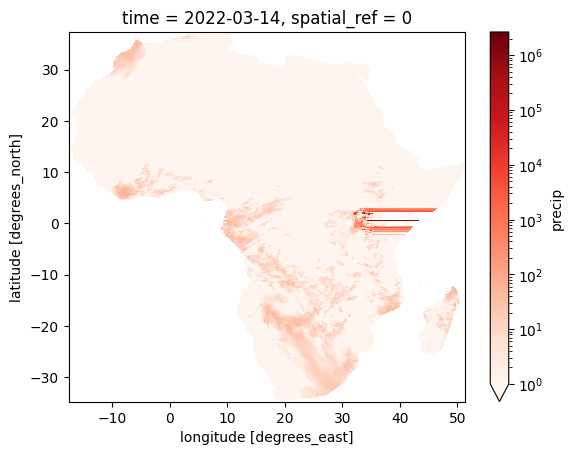

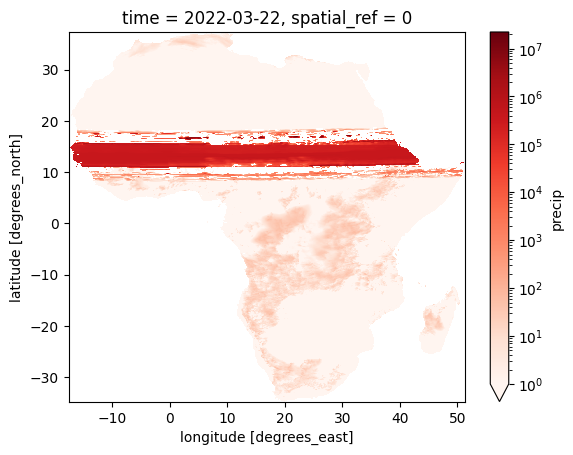

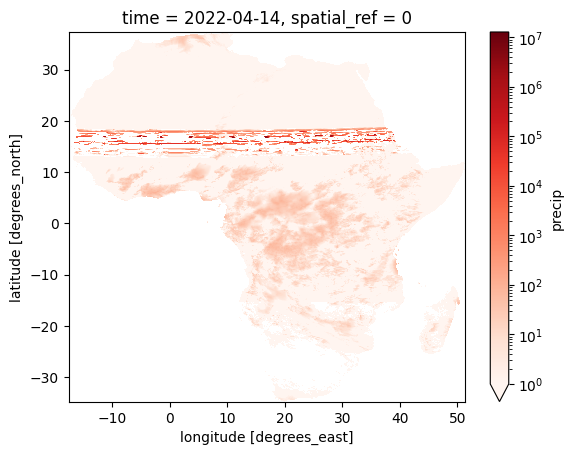

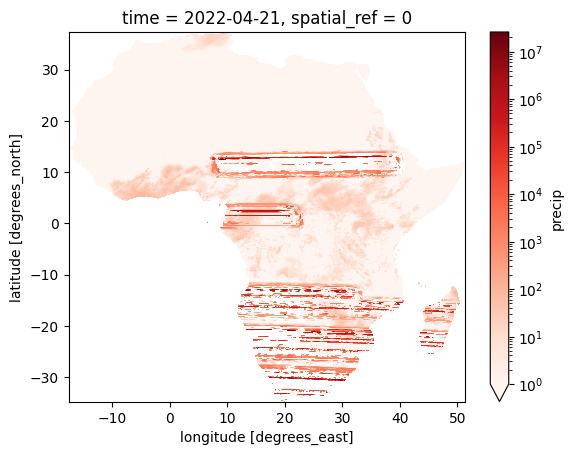

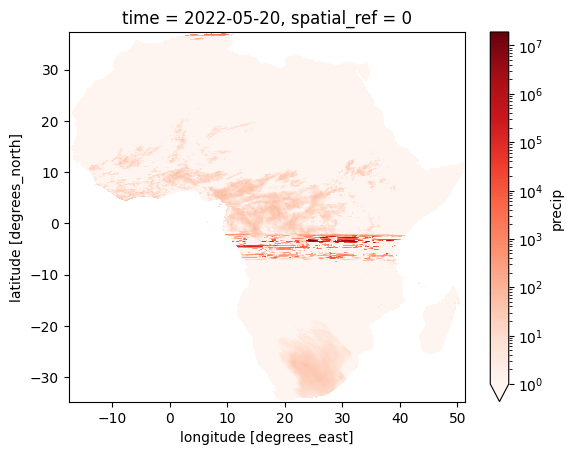

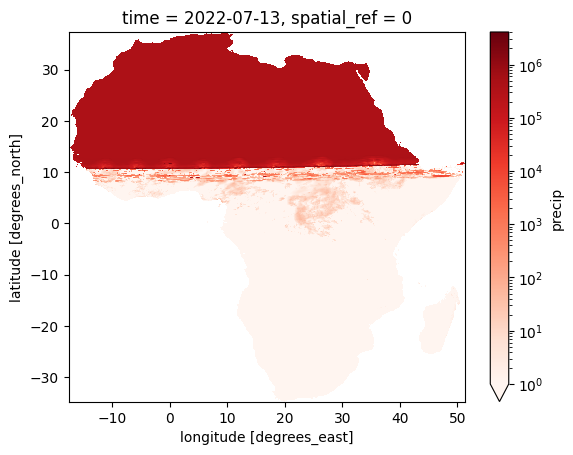

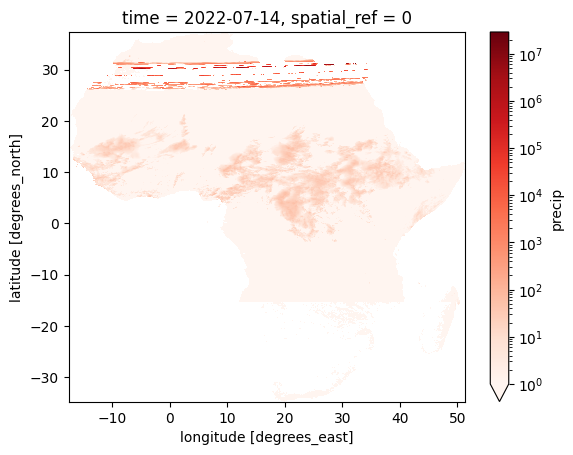

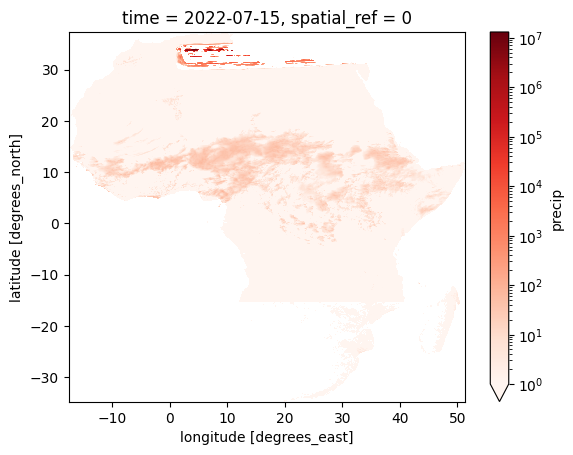

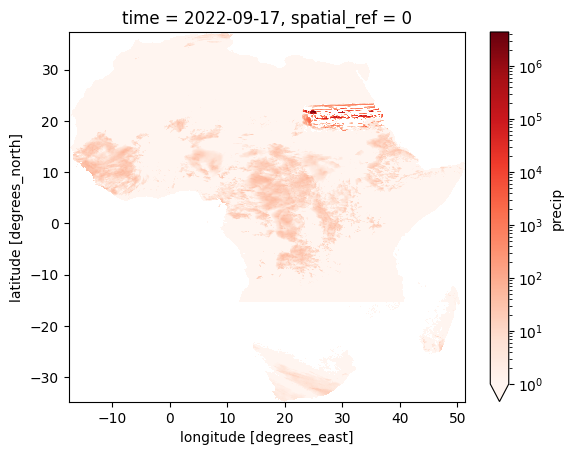

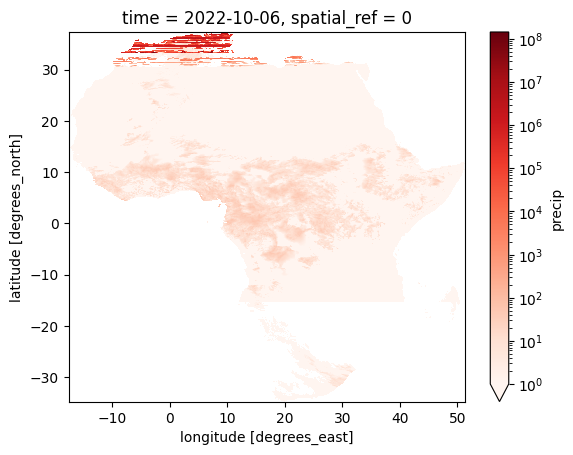

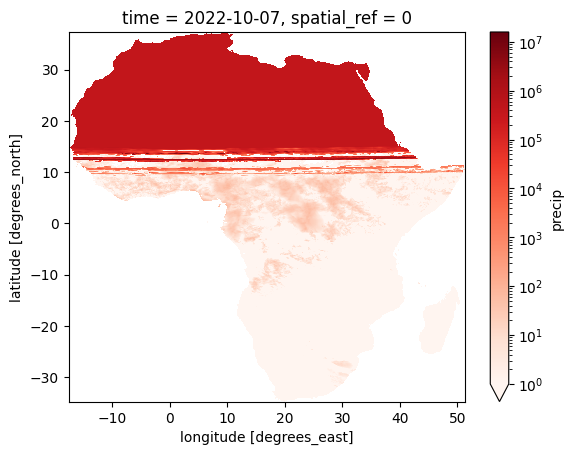

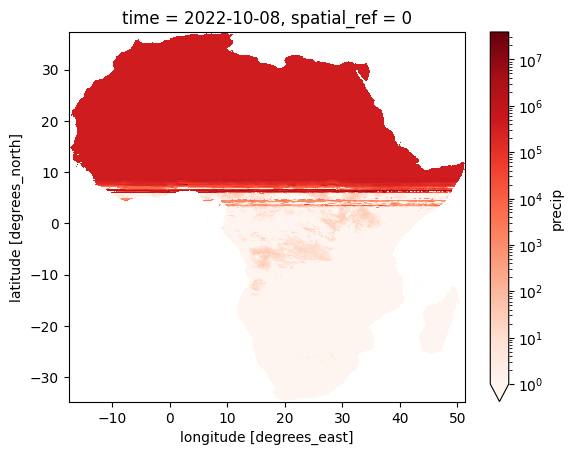

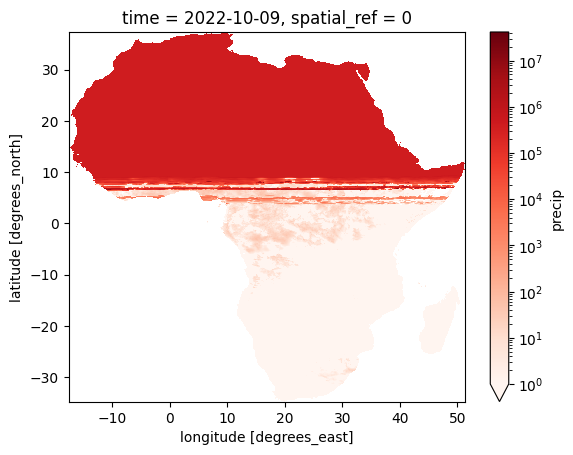

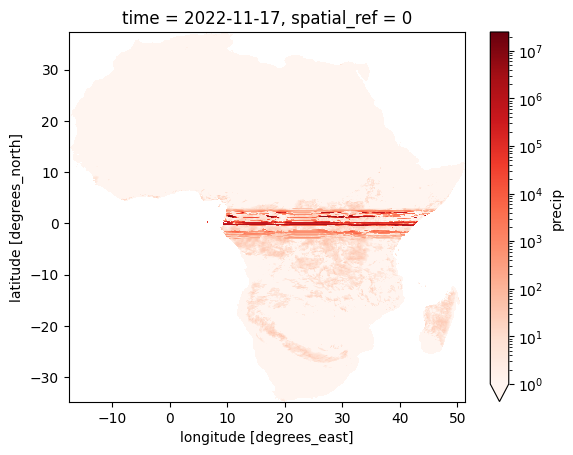

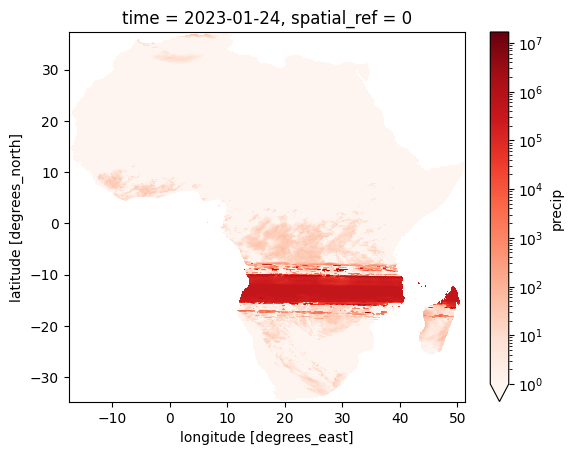

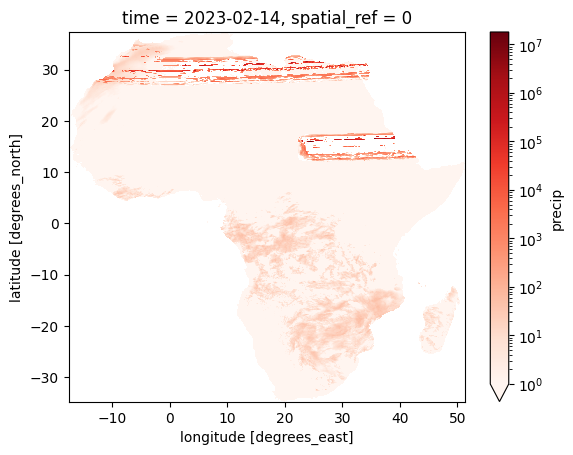

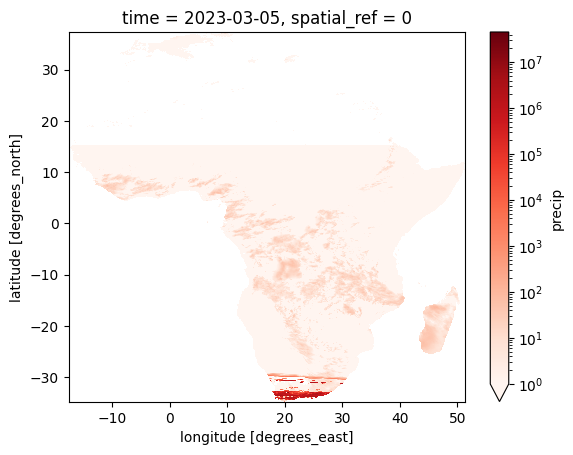

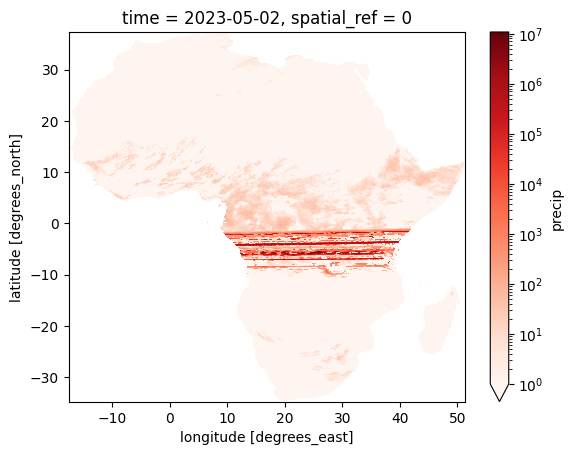

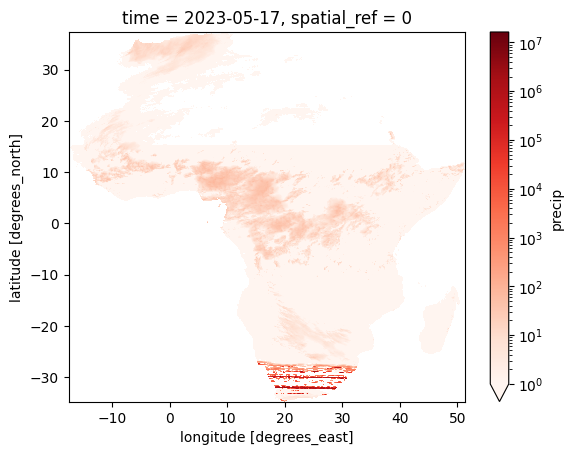

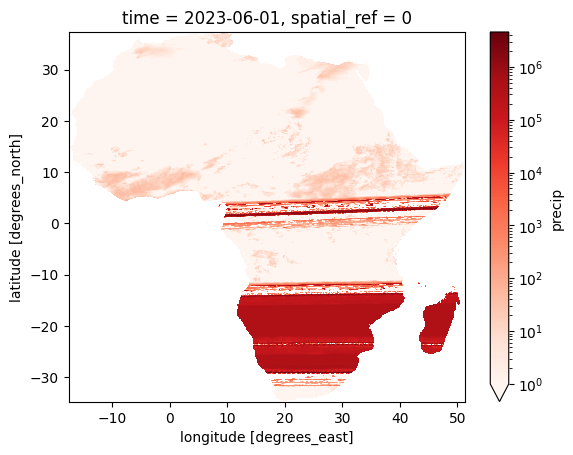

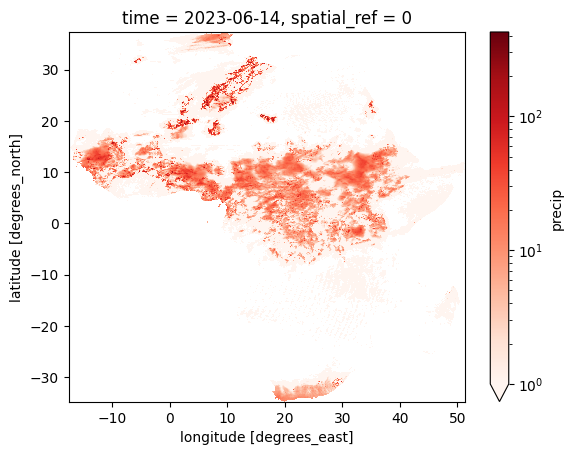

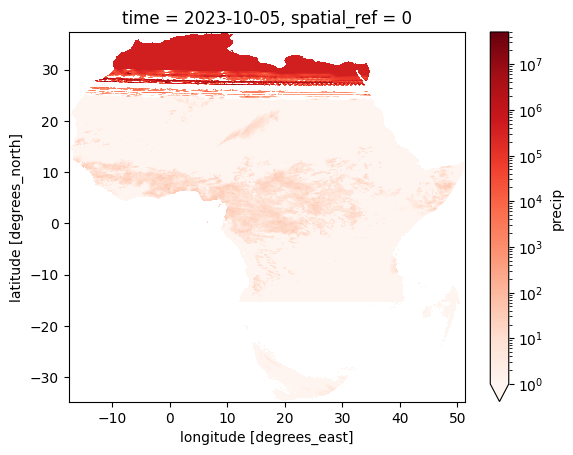

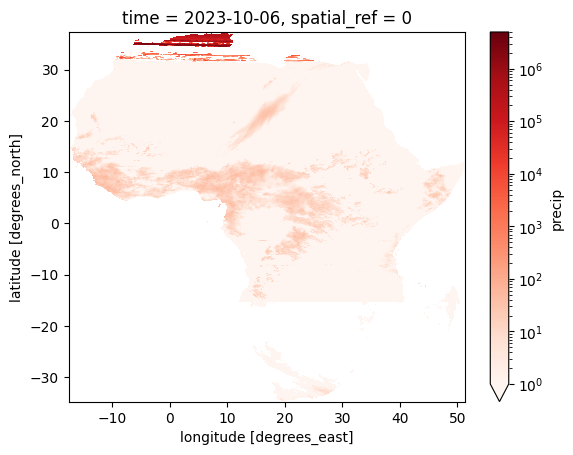

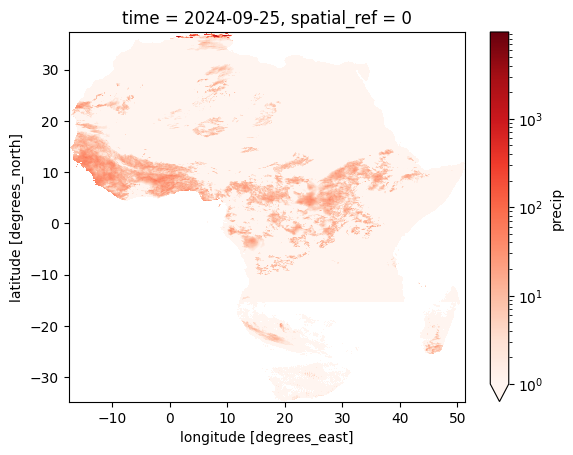

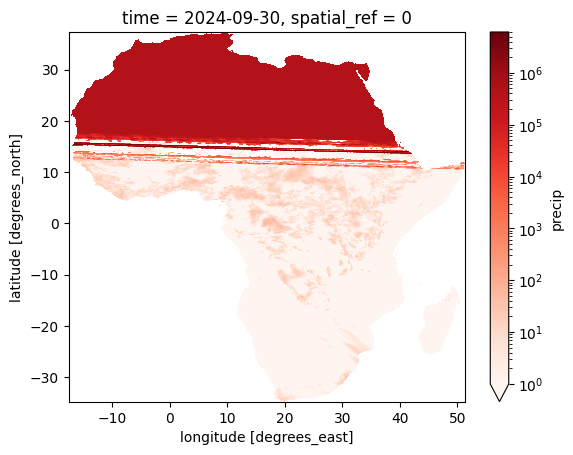

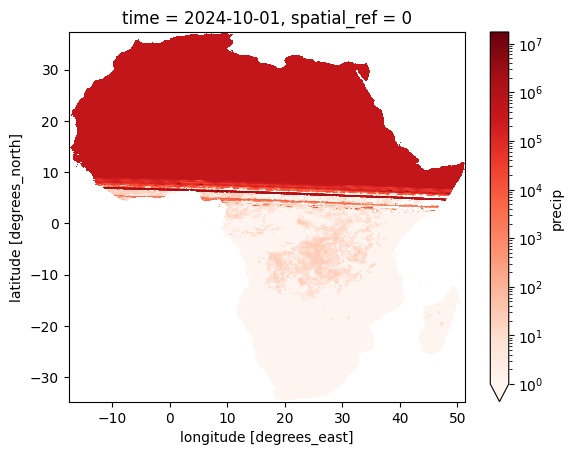

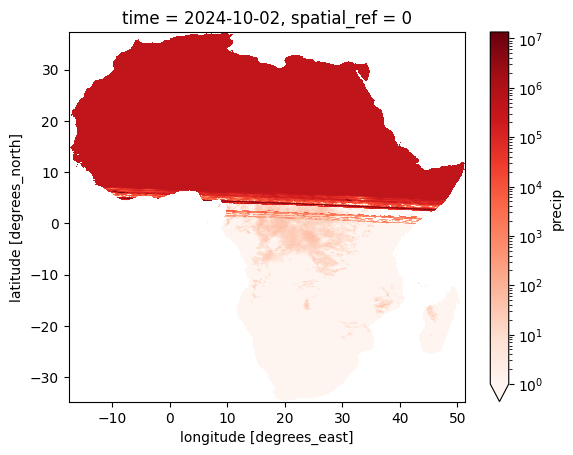

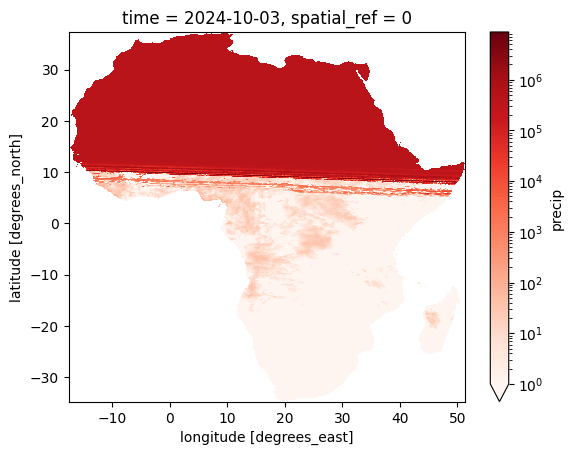

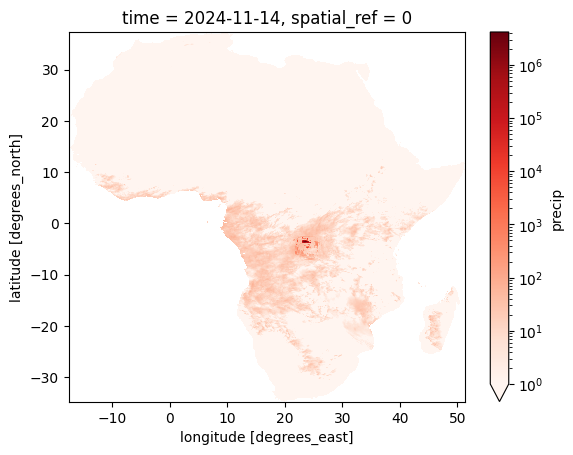

In [32]:
# Plots for all of these days
#for i in range(0, len(ds.time.values)):
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

for i in range(0, len(ds.time.values)):
    log_norm = mcolors.LogNorm(vmin=1, vmax=ds.precip.isel(time=i).max().values)
    ds.precip.isel(time=i).plot(
        x='lon',
        y='lat',
        norm=log_norm,
        cmap='Reds',
    )
    plt.show()